In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [11]:
df=pd.read_csv("svm_customer_data.csv")
df

,Age,Balance,Exited
0,32.980285,19912.928365,0.0
1,29.170414,37342.895576,0.0
2,33.886131,46977.249576,0.0
3,39.138179,38259.722084,0.0
4,28.595080,17845.040272,0.0
...,...,...,...
495,40.645537,76626.796485,1.0
496,46.120601,101572.238322,1.0
497,40.467702,87690.114335,1.0
498,41.330893,73145.852123,1.0


In [12]:
x=df.drop("Exited",axis=1)
y=df["Exited"]

In [17]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[-0.46041604, -1.30428179],
       [-0.86736471, -0.67169328],
       [-0.36365871, -0.32203218],
       [ 0.1973351 , -0.63841876],
       [-0.92881865, -1.37933197],
       [-0.92880813, -1.07878519],
       [ 0.23334196, -0.57034851],
       [-0.28691508, -1.1436586 ],
       [-1.07963254, -0.80932927],
       [-0.43103406, -0.71327882],
       [-1.07575089, -1.20731999],
       [-1.07723266, -0.95547304],
       [-0.6236829 , -1.87927668],
       [-2.00494719, -1.23561621],
       [-1.8842284 , -1.01152209],
       [-1.13911517, -1.30047804],
       [-1.42786215, -0.46422728],
       [-0.57735644, -1.35342488],
       [-1.3606928 , -1.06595496],
       [-1.68387845, -0.90023023],
       [ 0.16056038, -0.51972329],
       [-0.9234499 , -1.35508588],
       [-0.73547522, -0.60047107],
       [-1.69185394, -0.93521901],
       [-1.12764023, -1.2231665 ],
       [-0.70766437, -0.80402059],
       [-1.5164085 , -0.8803941 ],
       [-0.53797356, -1.11246025],
       [-1.16369388,

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

accuracy for kernal linear:100.00%


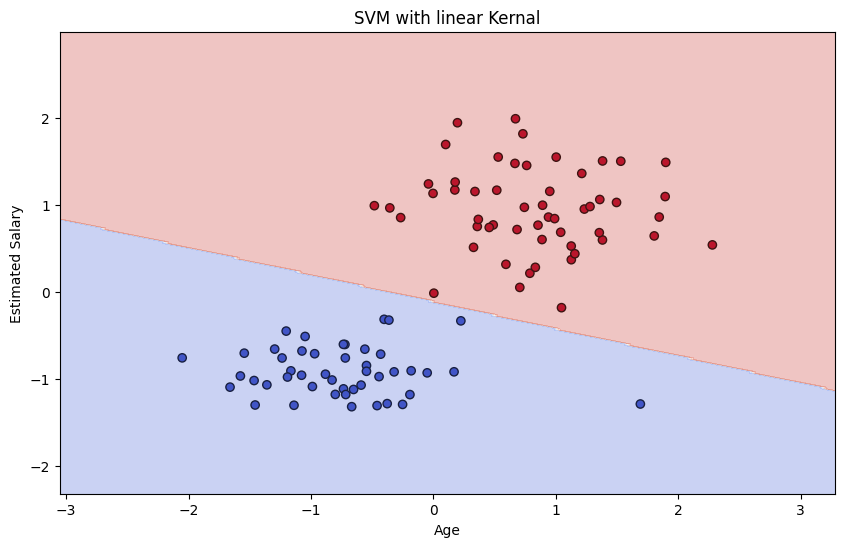

accuracy for kernal poly:99.00%


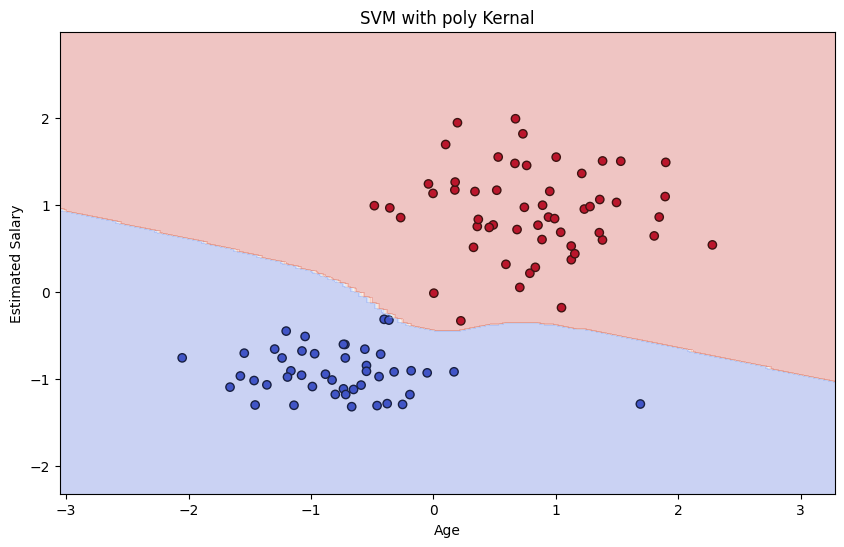

accuracy for kernal rbf:100.00%


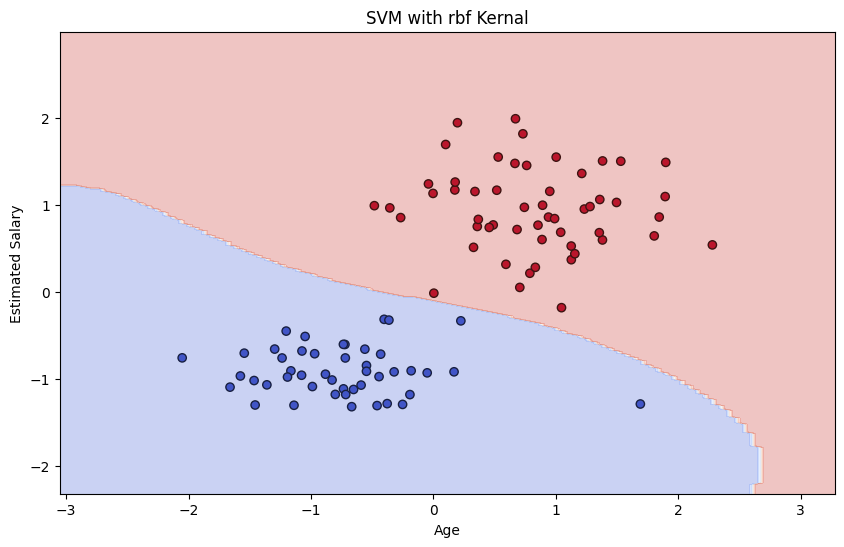

accuracy for kernal sigmoid:100.00%


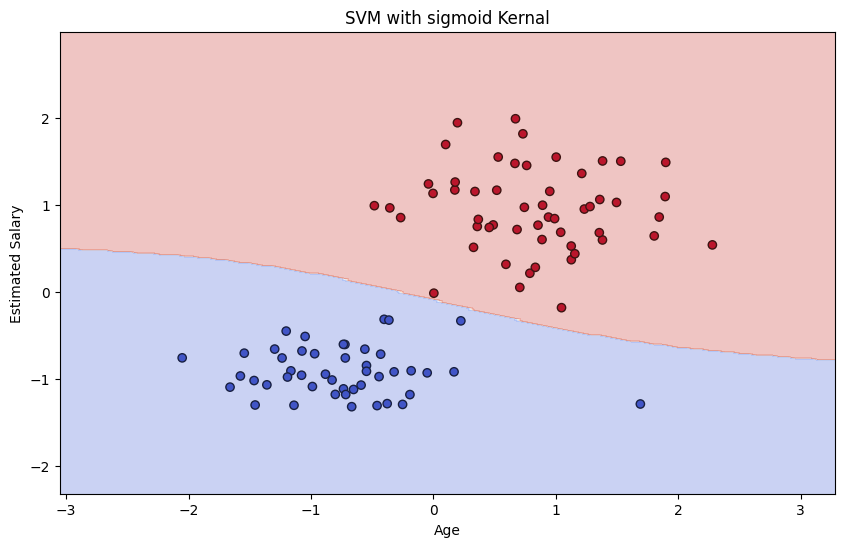

In [15]:
kernal=['linear','poly','rbf','sigmoid']
for i in kernal:
  model=SVC(kernel=i,degree=3,gamma="auto")
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"accuracy for kernal {i}:{accuracy*100:.2f}%")
  plt.figure(figsize=(10,6))
  plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='coolwarm',edgecolors='k')
  x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
  y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,300))
  z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3,cmap='coolwarm')
  plt.title(f'SVM with {i} Kernal')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.show()

In [16]:
new_data=np.array([[30,80000]])
new_data_scalar=scalar.transform(new_data)
prediction=model.predict(new_data_scalar)
prediction

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.])